In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose



In [110]:
FDI= pd.read_csv(r'C:\Users\dell\Desktop\data sets\FDI data.csv',index_col=0)
FDI.head()


,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
Sector,,,,,,,,,,,,,,,,,
METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [122]:
FDI.columns=list(range(2000,2017))
FDI.columns

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016],
      dtype='int64')

In [123]:
FDI.describe()
FDI.info()
FDI.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, METALLURGICAL INDUSTRIES to MISCELLANEOUS INDUSTRIES
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2000    63 non-null     float64
 1   2001    63 non-null     float64
 2   2002    63 non-null     float64
 3   2003    63 non-null     float64
 4   2004    63 non-null     float64
 5   2005    63 non-null     float64
 6   2006    63 non-null     float64
 7   2007    63 non-null     float64
 8   2008    63 non-null     float64
 9   2009    63 non-null     float64
 10  2010    63 non-null     float64
 11  2011    63 non-null     float64
 12  2012    63 non-null     float64
 13  2013    63 non-null     float64
 14  2014    63 non-null     float64
 15  2015    63 non-null     float64
 16  2016    63 non-null     float64
dtypes: float64(17)
memory usage: 8.9+ KB


2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
dtype: int64

In [124]:
FDI_statistics=FDI.describe()
FDI_statistics.T



,count,mean,std,min,25%,50%,75%,max
2000,63.0,37.757302,112.227860,0.0,0.000,4.03,23.510,832.07
2001,63.0,63.931587,157.878737,0.0,0.000,5.07,44.830,873.23
2002,63.0,42.925714,86.606439,0.0,0.200,11.01,36.555,419.96
2003,63.0,34.727778,67.653735,0.0,0.215,6.37,38.660,368.32
2004,63.0,51.090317,101.934873,0.0,0.715,9.09,43.205,527.90
2005,63.0,87.932540,206.436967,0.0,1.230,22.62,63.855,1359.97
2006,63.0,198.281905,686.783115,0.0,4.160,25.82,108.325,4713.78
2007,63.0,390.085714,1026.249935,0.0,9.950,58.82,279.270,6986.17
2008,63.0,498.348571,1134.649040,0.0,11.950,84.88,383.320,6183.49
2009,63.0,410.069524,926.814626,0.0,7.880,69.74,341.595,5466.13


Text(0.5, 1.0, 'FDI in all sectors of Indian Economy')

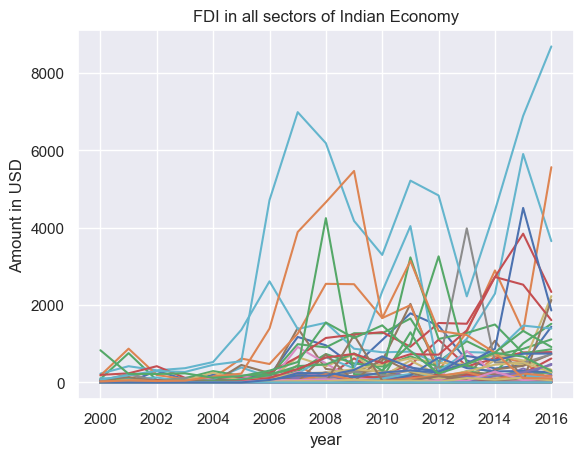

In [125]:
plt.plot(FDI.T)
plt.xlabel('year')
plt.ylabel('Amount in USD')
plt.title('FDI in all sectors of Indian Economy')

### the above given plot is messy and coveing very little interpretable information so to understand the FDI more clearly we get the data of the top 5 sectors of investments from the given data 

<Figure size 400x400 with 0 Axes>

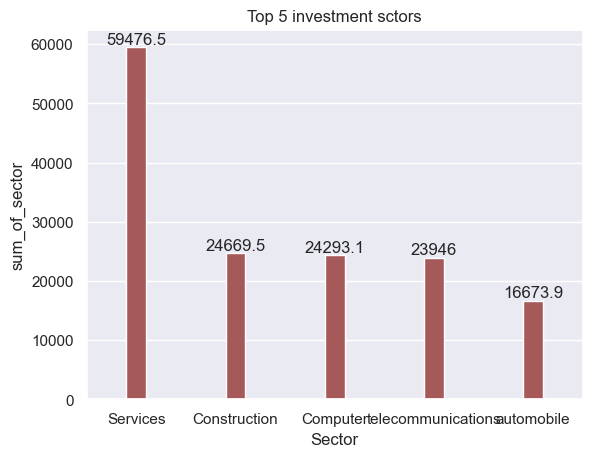

<Figure size 400x400 with 0 Axes>

In [126]:
FDI_sum=FDI.copy()
FDI_sum['sum_of_sector']=FDI.sum(axis=1)
FDI_sum.head()
FDI_sum_T5=FDI_sum.sum_of_sector.sort_values(ascending=False).head(5).reset_index()
FDI_sum_T5['Sector']=['Services','Construction','Computer','telecommunications','automobile']

sum_plot=sns.barplot(x='Sector',y='sum_of_sector',data=FDI_sum_T5,color='red',saturation=0.3,width=0.2)
for bars in sum_plot.containers:
    sum_plot.bar_label(bars)
    sns.set(style="darkgrid")
plt.title("Top 5 investment sctors")
plt.figure(figsize=(4,4))

Text(0.5, 1.0, 'mean investment plot ')

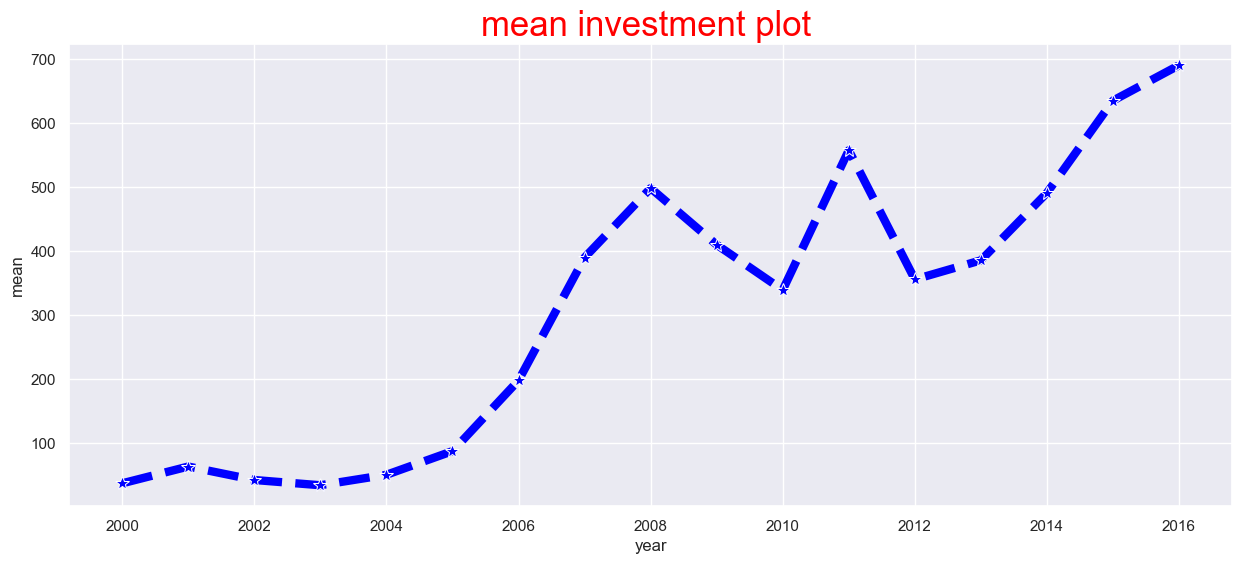

In [127]:
mean=FDI_statistics.loc['mean'].to_list()
year=FDI.columns.to_list()
std=FDI_statistics.loc['std'].to_list()
Mean_investment=pd.DataFrame({'year':year,'mean':mean,'std':std})
plt.figure(figsize=(15,6))
sns.set(style='darkgrid')
sns.lineplot(x='year',y='mean',data=Mean_investment,marker='*',linestyle='--',linewidth=6,color='blue',markersize=10)
plt.title("mean investment plot ",size=25,color='red')

### from the above plot I can say that the average investments in the various sectors have increased considerably after BJP has taken over

In [56]:
dataframe=DF.drop(['SUm'],axis=1)

In [129]:
FDI.T
FDI.T.columns
top_5 =FDI.T[['CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects','SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)','COMPUTER SOFTWARE & HARDWARE', 'TELECOMMUNICATIONS', 'AUTOMOBILE INDUSTRY' ]]

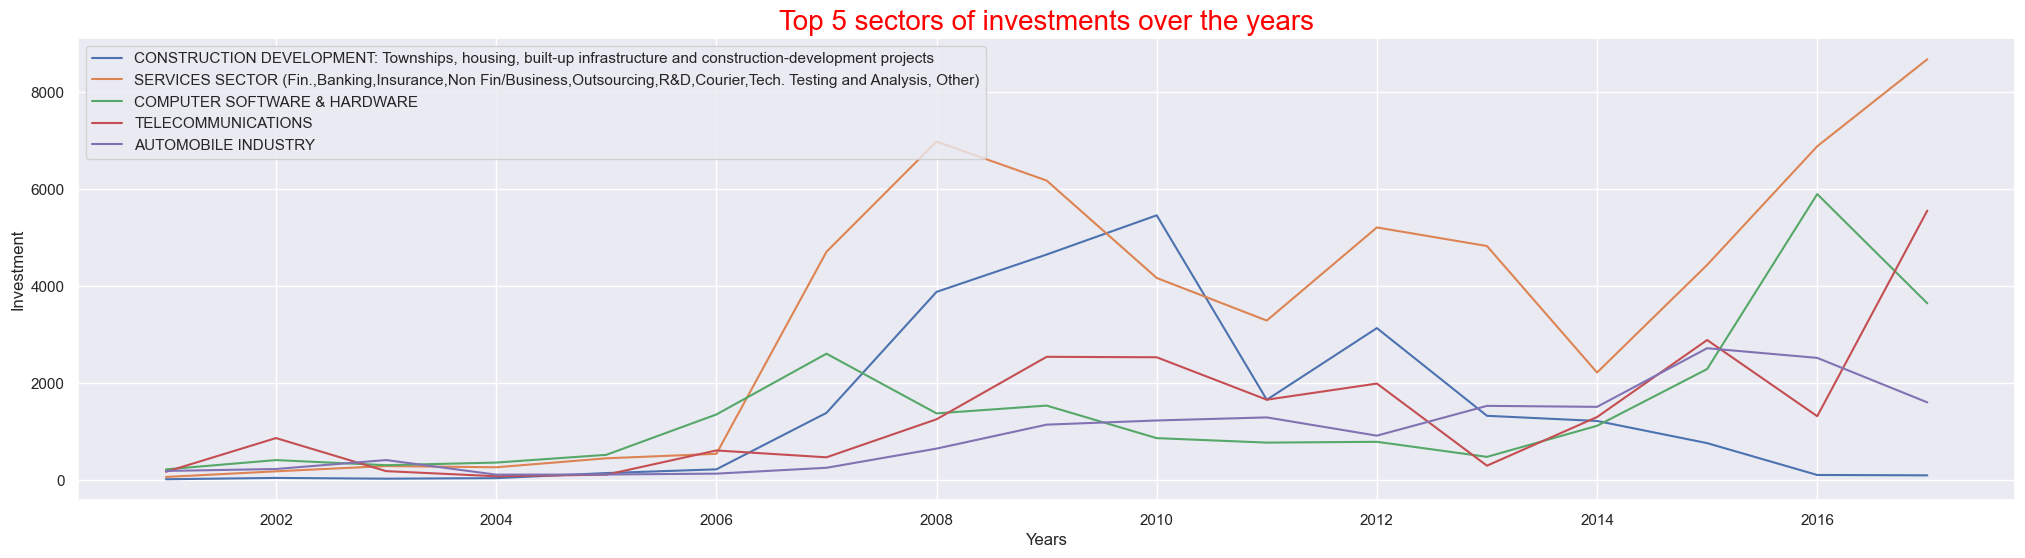

In [128]:
plt.figure(figsize=(25,6))
plt.plot(top_5)
plt.xlabel('Years')
plt.ylabel('Investment')
plt.title('Top 5 sectors of investments over the years',color='red',size=20)

plt.legend(top_5.columns)
plt.show()

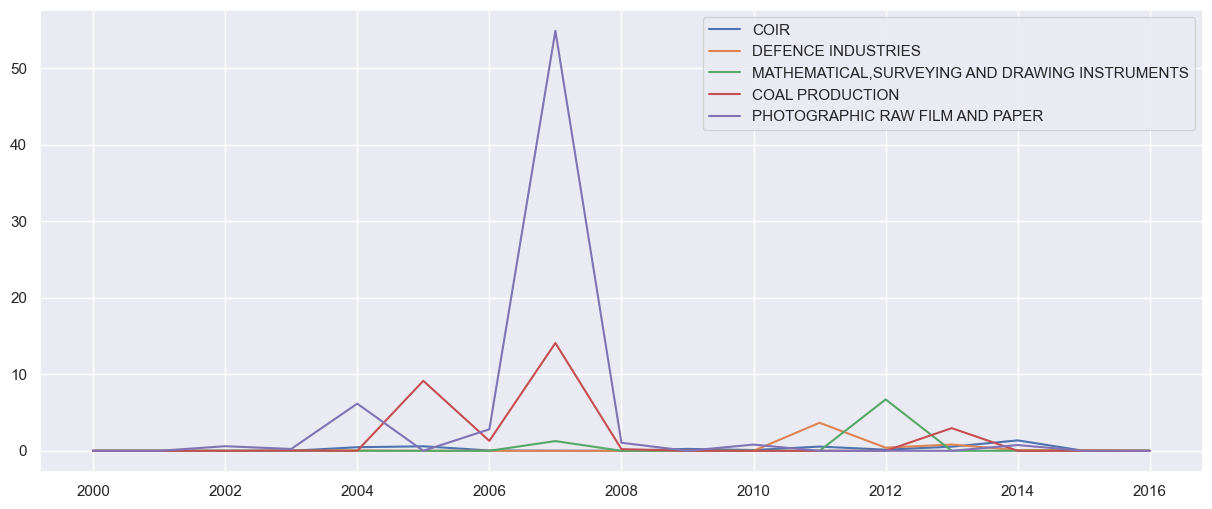

In [131]:

FDI_sum_L5=FDI_sum.T.sort_values(by='sum_of_sector',axis=1)
lowest_5=FDI.T[['COIR','DEFENCE INDUSTRIES','MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS','COAL PRODUCTION','PHOTOGRAPHIC RAW FILM AND PAPER']]
plt.figure(figsize=(15,6))
plt.legend(lowest_5.columns)
plt.plot(lowest_5)
plt.legend(lowest_5.columns)
plt.show()

In [60]:
new = FDI.T[['SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)']]
new.rename(columns={'SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)':'Services'}, inplace=True)
new.head()


Sector,Services
2001,71.38
2002,187.95
2003,296.34
2004,271.15
2005,456.15


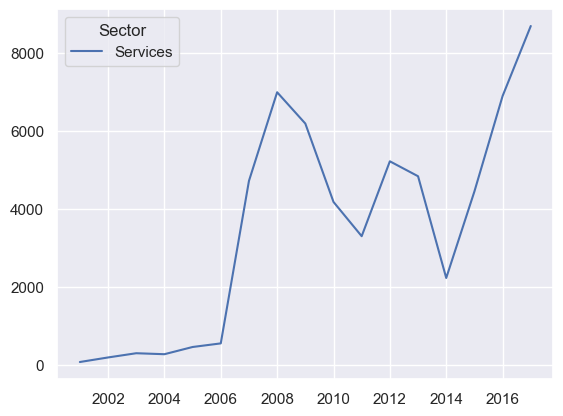

Test_statistic:-1.2559882309570103
P-value:0.6490596953173586


In [132]:
new.plot()
plt.show()
result=adfuller(new['Services'])
result
print('Test_statistic:'+ str(result[0]))
print('P-value:'+str(result[1]))

Test_statistic:-1.9057082386853355
P-value:0.32938055850536496


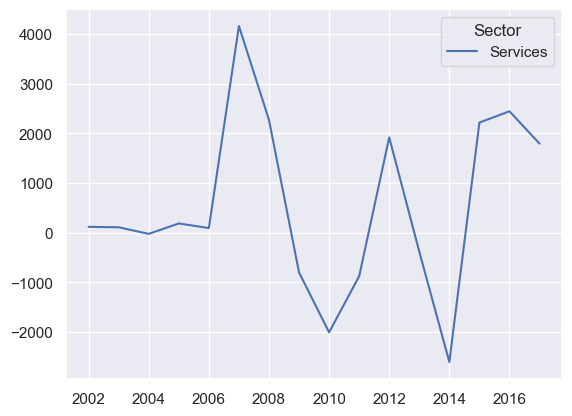

In [133]:
services_diff=new.diff(1).dropna()
services_diff

services_diff.plot()

result=adfuller(services_diff['Services'])
print('Test_statistic:'+ str(result[0]))
print('P-value:'+str(result[1]))

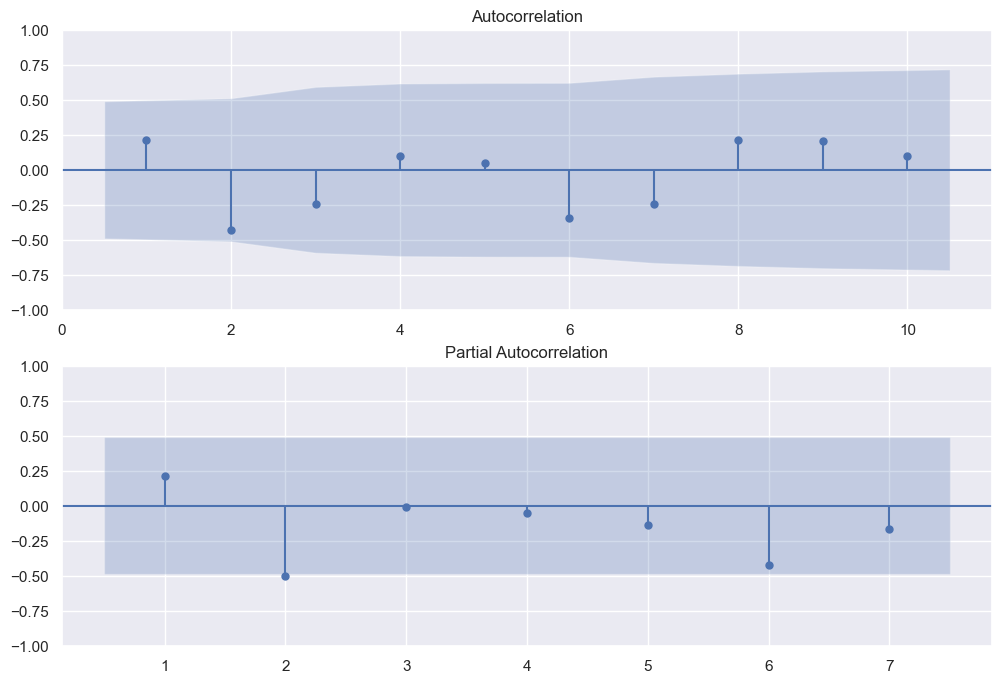

In [134]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

plot_acf(services_diff, lags=10, zero=False, ax=ax1)

plot_pacf(services_diff, lags=7, zero=False, ax=ax2)

plt.show()


In [135]:
for p in range(4):
    for q in range(3):
      try:
        model = SARIMAX(new, order=(p,1,q), trend='c')
        results = model.fit()
        
        print(p, q, results.aic, results.bic)
        
      except:
        print(p, q, None, None)

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-p

0 0 288.08368877355866 289.62886621803824
0 1 287.37318495733393 289.6909511240533
0 2 285.7806915044828 288.8710463934419
1 0 289.35428903032 291.67205519703936


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1 1 288.97252971977844 292.06288460873753


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\

1 2 286.76193551441384 290.6248791256127
2 0 286.9487609071438 290.0391157961029
2 1 289.3733963279715 293.23633993917036
2 2 290.13431166929263 294.7698440027313
3 0 288.7552620803903 292.6182056915892


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


3 1 290.7501928869481 295.3857252203868


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


3 2 289.9987937765951 295.40691483227357


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


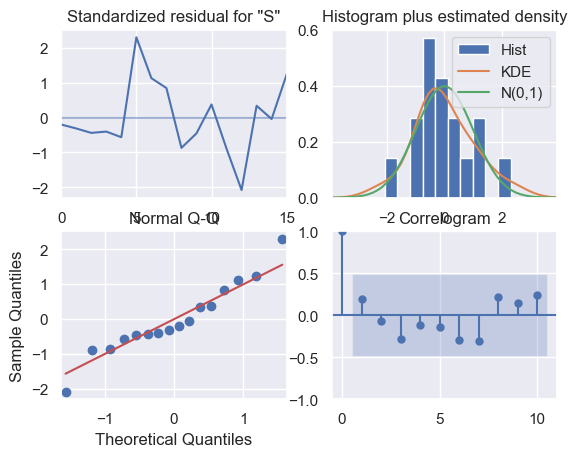

                               SARIMAX Results                                
Dep. Variable:               Services   No. Observations:                   17
Model:               SARIMAX(0, 1, 2)   Log Likelihood                -138.890
Date:                Tue, 30 Apr 2024   AIC                            285.781
Time:                        11:50:28   BIC                            288.871
Sample:                             0   HQIC                           285.939
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    451.0233    103.521      4.357      0.000     248.126     653.920
ma.L1         -0.2025      0.460     -0.440      0.660      -1.105       0.700
ma.L2         -0.7953      0.368     -2.159      0.0

In [136]:
model = SARIMAX(new, order=(0,1,2), trend='c')
results = model.fit()

results.plot_diagnostics()
plt.show()

print(results.summary())

In [137]:
one_step_forecast = results.get_prediction(start=-10)

mean_forecast = one_step_forecast.predicted_mean

confidence_intervals = one_step_forecast.conf_int()
# confidence_intervals

lower_limits = confidence_intervals.loc[:,'lower Services']
upper_limits = confidence_intervals.loc[:,'upper Services']

print(mean_forecast)
# one_step_forecast
# new.tail()

2008    5399.359348
2009    5004.099438
2010    5380.714974
2011    3923.018427
2012    4699.705083
2013    6058.143352
2014    5069.927954
2015    3981.429425
2016    6945.887623
2017    7003.361267
Name: predicted_mean, dtype: float64


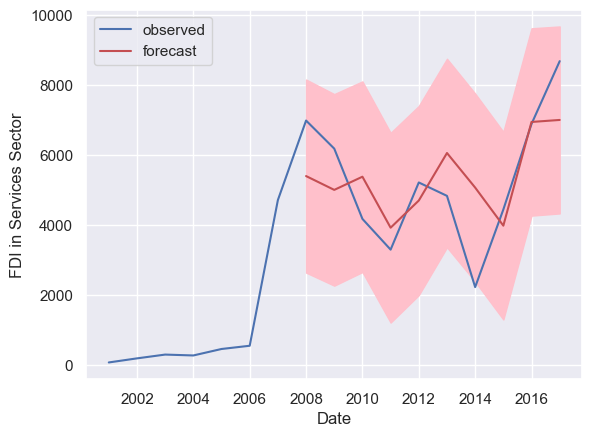

In [138]:
plt.plot(new.index, new, label='observed')

plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')

plt.fill_between(lower_limits.index,lower_limits, upper_limits, color='pink')

plt.xlabel('Date')
plt.ylabel('FDI in Services Sector')
plt.legend()
plt.show()

In [139]:
dynamic_forecast = results.get_forecast(steps=5)

mean_forecast = dynamic_forecast.predicted_mean

confidence_intervals= dynamic_forecast.conf_int()

lower_limits = confidence_intervals.loc[:,'lower Services']
upper_limits = confidence_intervals.loc[:,'upper Services']

mean_forecast.index=range(2017, 2022)
mean_forecast.index
print(mean_forecast)


2017    8925.557358
2018    8110.657839
2019    8561.681138
2020    9012.704438
2021    9463.727737
Name: predicted_mean, dtype: float64


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


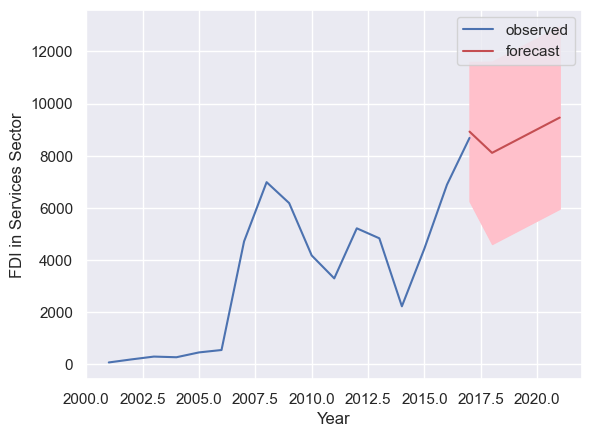

In [140]:
plt.plot(new.index, new, label='observed')

plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')

plt.fill_between(mean_forecast.index, lower_limits, upper_limits, color='pink')

plt.xlabel('Year')
plt.ylabel('FDI in Services Sector')
plt.legend()
plt.show()

In [141]:
forcast= results.forecast(1)
forcast


C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


17    8925.557358
dtype: float64

### This the completye analysis of the FDI 
### The forecast for the year 2017 is 8925.55 USD